# INST126 &ndash; April 30, 2024

## Lecture: Advanced Data Analysis [[slides](https://docs.google.com/presentation/d/1QsCHu71IzPwA1NasYgYtOH0oIxgOdRMm/edit#slide=id.g23d00abd9b2_2_55)] 

This notebook allows you to replicate the code written in class. Note that this notebook is _not_ the review notebook for this week's discussion, which can be found on ELMS at a different link. 

# Loading the data

This is the data we are going to use for this notebook:

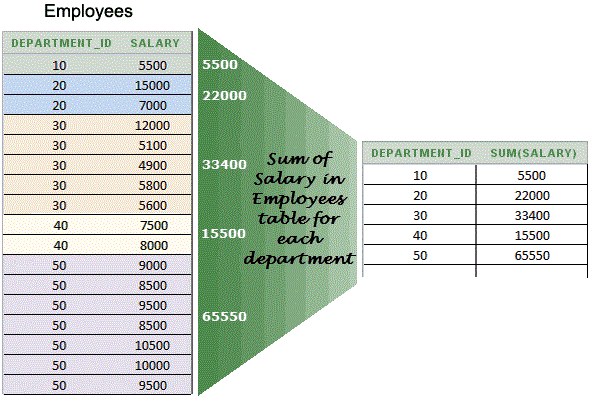

The cell below loads the data into a pandas Dataframe.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'dept_id': [10, 20, 20, 30, 30, 30, 30, 30, 40, 40, 50, 50, 50, 50, 50, 50, 50],
    'salary': [5500, 15000, 7000, 12000, 5100, 4900, 5800, 5600, 7500, 8000, 9000, 8500, 9500, 8500, 10500, 10000, 9500]
})

# Basic Aggregation

This is used when we want to apply an aggregation function across the rows of individual columns. It is used to get basic facts about the dataset as a whole.

The most basic way to achieve this is to use dataframe's dict-like indexing to lookup a column (a pandas Series), and then calling individual methods of that series.

In [ ]:
# What is the salary of the average employee?
df['salary'].mean()

In [ ]:
# How many departments are included the data?
df['dept_id'].nunique()

If we want to perform multiple aggregations at once we can make use of the `.agg()` method of Dataframes. The multiplicity can refer to the columns I want to aggregate, the aggregation functions I want to use, or both. This is reflected in the return type -- a scalar (shown above), a Series, or a Dataframe.

In [ ]:
# Multiple aggregation many to one -- multiple functions on the same column
df['salary'].agg(["sum", "min"])

In [ ]:
# many to many aggregation --- multiple functions on multiple columns
df.agg({
    'dept_id': ['min', 'max', 'nunique'],
    'salary': ['min', 'max', 'mean']
})

In [ ]:
df.sum()

# Aggregation by category

Often times our data also include information about specific categories that each observation belongs to, and I may be interested in asking questions about attributes of the data by category. In our dataset, for example, each employee (observation) belongs to one department (category).

The simplest is just counting the frequency of each category.

In [ ]:
# How many (frequency) employees are in each department (category)?
df['dept_id'].value_counts()

Note that by default the resulting series is sorted by frequency -- in this case the most frequent department is dept 50. 

## Split-apply-combine

More generally, I may want to do other forms of aggregation other than counting the frequency. This is the most general pattern of aggregation offered by Pandas.

Let's load a new variant of the dataset with additional information included -- the age and gender of each employee (M/F).

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'dept_id': [10, 20, 20, 30, 30, 30, 30, 30, 40, 40, 50, 50, 50, 50, 50, 50, 50],
    'salary': [5500, 15000, 7000, 12000, 5100, 4900, 5800, 5600, 7500, 8000, 9000, 8500, 9500, 8500, 10500, 10000, 9500],
    'age': [59, 45, 52, 30, 33, 28, 29, 30, 61, 18, 43, 30, 28, 63, 22, 29, 21],
    'gender': ['M', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F']
})

In [ ]:
# The first five rows
df.head()

In [ ]:
# Basic group by: one-to-one (by category) --- what's the average salary by department?
df.groupby('dept_id')['salary'].mean()

In [ ]:
# one-to-many group by --- same function on multiple columns (aggregated by category)
df.groupby('dept_id').mean(numeric_only=True)

In [ ]:
# Named aggregation
df.groupby('dept_id').agg(avg_salary=('salary', 'median'), seniority=('age', 'mean'))